In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [5]:
# sns.pairplot(df)
# plt.show()

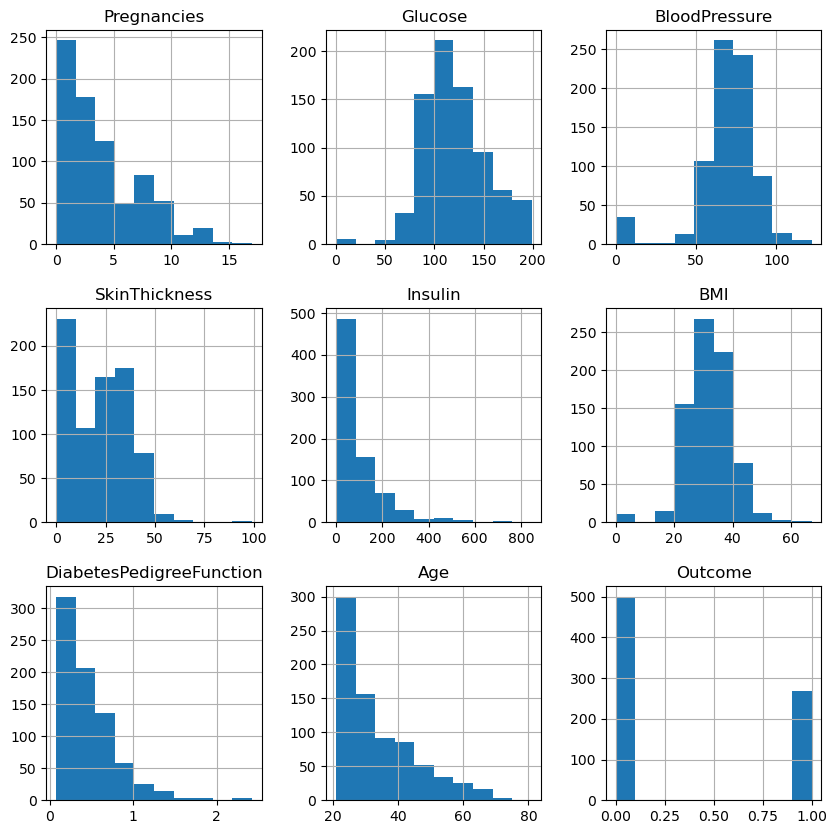

In [6]:
df.hist(bins=10, figsize=(10,10))
plt.show()

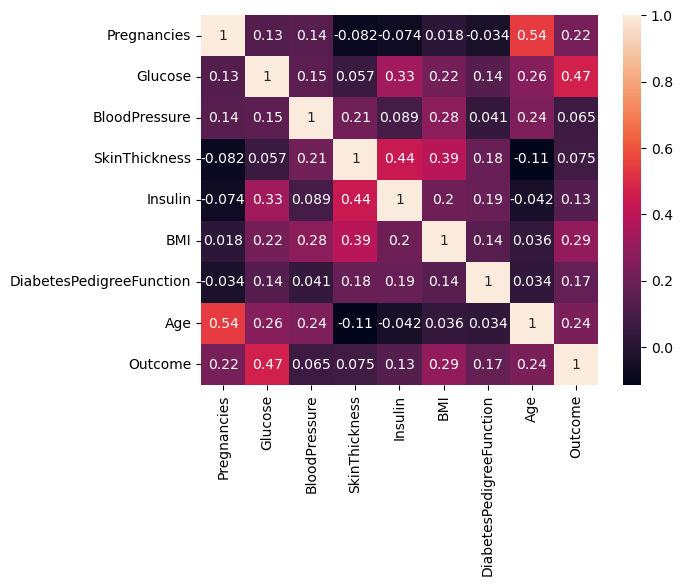

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


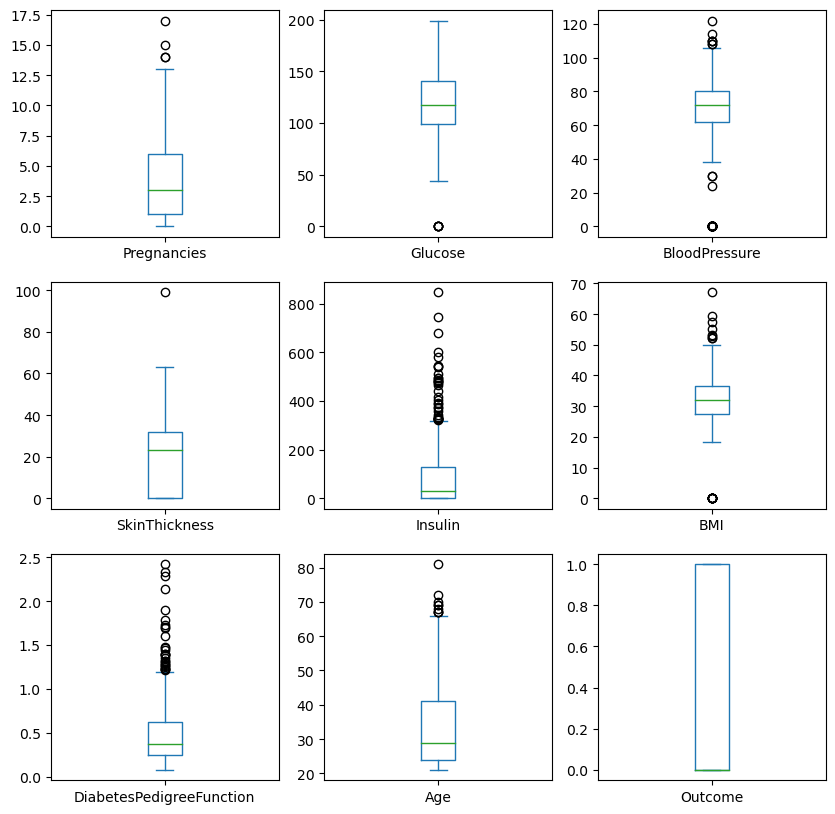

In [8]:
# check for missing values
print(df.isnull().sum())

# visualize the distribution of each variable using box plots
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()


In [9]:
# remove outliers using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

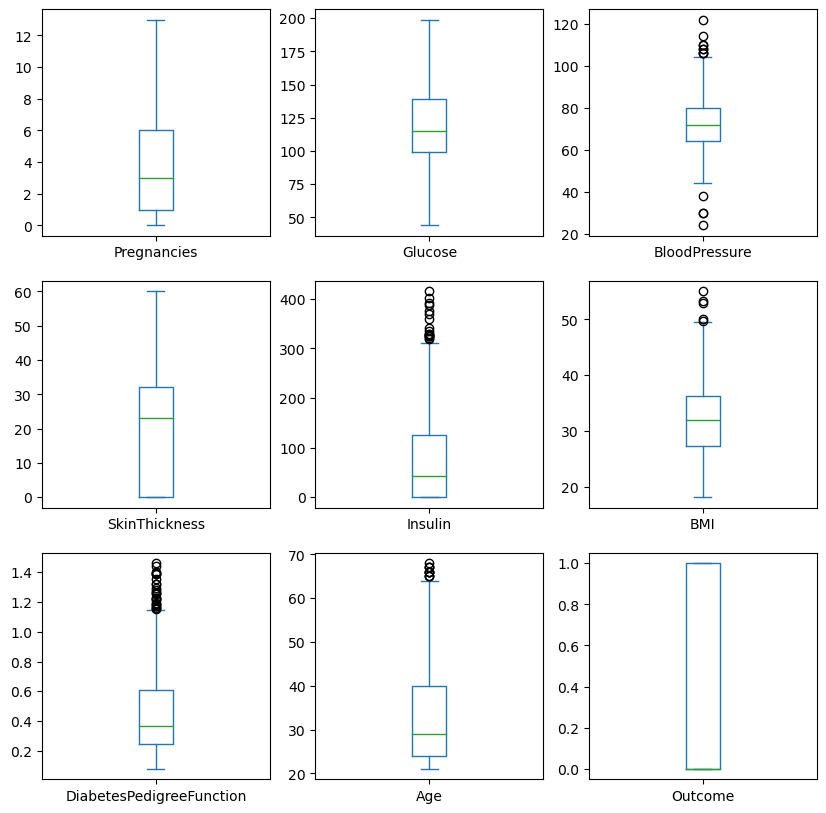

In [10]:
# visualize the distribution of each variable using box plots
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

In [11]:
# standardize the numeric variables
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

In [12]:
# split into input features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.656878,0.923368,-0.028095,0.922548,-0.804680,0.210132,0.606075,1.478144
1,-0.867858,-1.176226,-0.515390,0.533074,-0.804680,-0.847447,-0.363956,-0.183132
2,1.266772,2.089810,-0.677822,-1.349384,-0.804680,-1.346020,0.764232,-0.095696
3,-0.867858,-1.042919,-0.515390,0.143600,0.238525,-0.620823,-1.010643,-1.057488
5,0.351930,-0.143093,0.134337,-1.349384,-0.804680,-0.998529,-0.891146,-0.270567
...,...,...,...,...,...,...,...,...
763,1.876666,-0.642996,0.296769,1.766408,1.192946,0.104374,-0.996584,2.614807
764,-0.562911,0.056869,-0.190527,0.403249,-0.804680,0.693597,-0.402616,-0.532874
765,0.351930,0.023542,-0.028095,0.143600,0.438287,-0.907880,-0.736504,-0.270567
766,-0.867858,0.190176,-1.002686,-1.349384,-0.804680,-0.318657,-0.370985,1.215838


In [14]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 688, dtype: int64

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [15]:
from sklearn.model_selection import train_test_split

# split into training and test sets"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create decision tree classifier object
tree = DecisionTreeClassifier()

# define hyperparameters to tune
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]}

# perform grid search cross-validation
grid = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# get best hyperparameters
best_params = grid.best_params_
print(best_params)

# train decision tree model on training set with best hyperparameters
tree = DecisionTreeClassifier(**best_params)
tree.fit(X_train, y_train)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4)

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set.
Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create decision tree classifier object
tree = DecisionTreeClassifier()

# define hyperparameters to tune
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]}

# perform grid search cross-validation
grid = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# get best hyperparameters
best_params = grid.best_params_
print(best_params)

# train decision tree model on training set with best hyperparameters
tree = DecisionTreeClassifier(**best_params)
tree.fit(X_train, y_train)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4)

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Confusion Matrix:
 [[71 14]
 [28 25]]


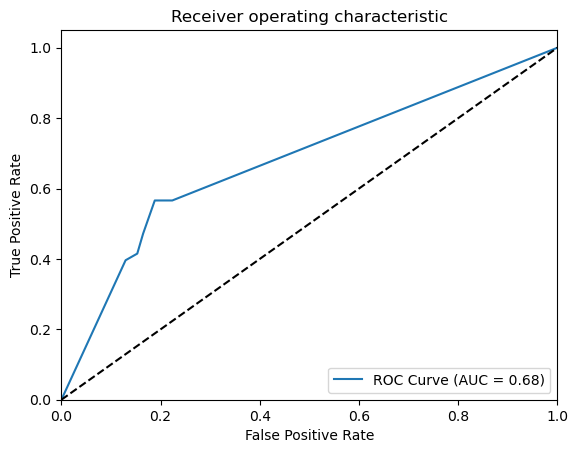

Accuracy: 0.6956521739130435
Precision: 0.6410256410256411
Recall: 0.4716981132075472
F1 Score: 0.5434782608695652
AUC: 0.6805771365149833


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# predict labels for test set
y_pred = tree.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# calculate ROC curve and AUC score
y_pred_prob = tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC:', auc)


### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends

Interpreting the decision tree can provide valuable insights into the factors that contribute the most to predicting the outcome of diabetes. In this case, the decision tree has several splits that separate the data based on different variables, such as glucose level, BMI, and age.

The first split is based on glucose level, which is not surprising since high glucose levels are a well-known risk factor for diabetes. The next split is based on BMI, which is also expected since high body mass index is associated with a higher risk of diabetes.

Another split is based on age, with the tree predicting a higher risk of diabetes for individuals over 28.5 years old. This is also a reasonable finding since the risk of diabetes generally increases with age.

Overall, the decision tree identifies glucose level as the most important predictor of diabetes, followed by BMI and age. The tree also highlights specific thresholds for these variables that are associated with a higher risk of diabetes.

By interpreting the decision tree in this way, healthcare professionals can gain valuable insights into the risk factors for diabetes and potentially develop targeted interventions to help prevent or manage the disease.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. 
Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

Validating the decision tree model is an important step to ensure that it can be applied to new data and remains robust even when the dataset or environment changes. One way to do this is through sensitivity analysis and scenario testing.

Sensitivity analysis involves examining how changes to the input variables affect the output of the model. For example, we can vary the glucose levels, BMI, or age of the patients in the dataset to see how the decision tree responds. This can help us understand how sensitive the model is to changes in the input variables and whether it can be relied upon to make accurate predictions in different contexts.

Scenario testing involves applying the decision tree model to hypothetical scenarios to explore its behavior and identify potential risks. For example, we can simulate changes in the prevalence of diabetes or the distribution of risk factors in the population to see how the model responds. This can help us identify potential limitations or biases in the model and develop strategies to mitigate them.

By conducting sensitivity analysis and scenario testing, we can gain a deeper understanding of the decision tree model and its limitations, and develop strategies to improve its accuracy and reliability in real-world settings.